In [ ]:
[Probability and Statistics for Data Science](https://www.ps4ds.net/) 

Code for Example 12.38 

Classification of wheat varieties from two properties of their seeds\
Topics: Classification, softmax regression

Author: Carlos Fernandez-Granda\
Data source: https://archive.ics.uci.edu/dataset/236/seeds

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
from sklearn import tree

font_size = 15
font_size_legend = 15
font_size_ticks = 15
font_size_graph = 15

dataset = np.loadtxt("../data/seeds_dataset.txt")
data = dataset[:,:-1]
labels = dataset[:,-1]

# Center the columns 
centered_data = data - data.mean(axis=0)
# Normalize each column (divide by standard deviation) to account for difference in units
standardized_data = (centered_data  / centered_data.std(axis=0)).T

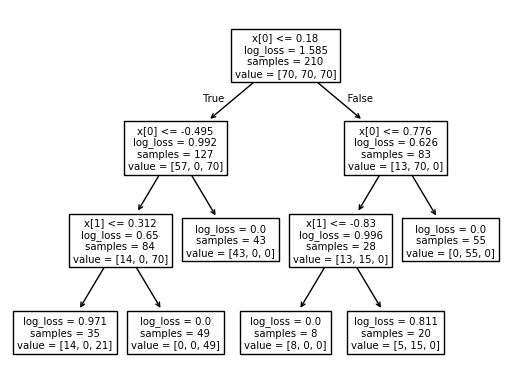

In [3]:
# Fit classification tree model based on first and sixth feature
# We fix the number of leafs to 6 and choose the log-likelihood as the metric to be maximized 
feature_1 = 0
feature_2 = 5
max_leafs = 6
data_train = standardized_data[[feature_1,feature_2],:].T
tree_classifier = tree.DecisionTreeClassifier(criterion='log_loss',max_leaf_nodes=max_leafs,random_state=0)
tree_classifier.fit(data_train, labels)
tree.plot_tree(tree_classifier);

In [5]:
train_score = tree_classifier.score(data_train, labels)
print("Training score:",round(train_score,4))

Training score: 0.9095


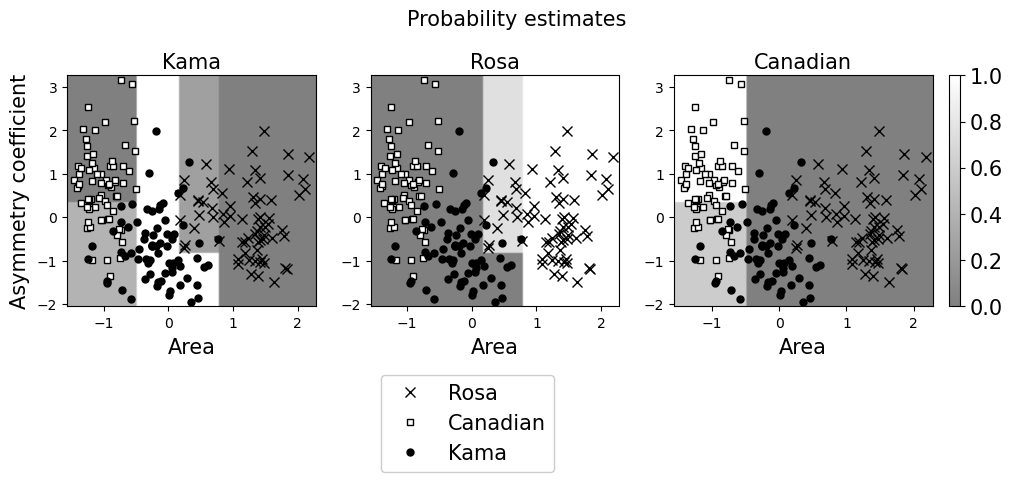

In [8]:
max_feature_1 = np.max(data_train[:,0]) + 0.1
max_feature_2 = np.max(data_train[:,1]) + 0.1
min_feature_1 = np.min(data_train[:,0]) - 0.1
min_feature_2 = np.min(data_train[:,1]) - 0.1

n_grid = 100
feature_1_aux = np.linspace(min_feature_1, max_feature_1, 100)  
feature_2_aux = np.linspace(min_feature_2, max_feature_2, 100) 

feature_1_grid, feature_2_grid = np.meshgrid(feature_1_aux, feature_2_aux)

msize=5
medgewidth=1
xtick_aux = np.arange(-1,3,1)

fig, axes = plt.subplots(1, 3, figsize=(12,3),width_ratios=[1,1,1.3])
varieties = ["Kama","Rosa","Canadian"]
fig.suptitle("Probability estimates",fontsize=font_size,y = 1.1)

for ind_c in range(3):

    dims_grid = feature_1_grid.shape
    probabilities = np.zeros(dims_grid)
    
    for ind_1 in range(dims_grid[1]):
        for ind_2 in range(dims_grid[1]):
            prob = tree_classifier.predict_proba(
                np.array([feature_1_grid[ind_1,ind_2],feature_2_grid[ind_1,ind_2]]).reshape(1, -1))
            probabilities[ind_1,ind_2] = prob[0][ind_c]
    
    im = axes[ind_c].imshow(probabilities, cmap='gray', vmin=-1, vmax=1,
                    extent=[min_feature_1,max_feature_1,min_feature_2, max_feature_2],
                    origin='lower', aspect='auto')
    axes[ind_c].plot(standardized_data[feature_1,:][labels==2],standardized_data[feature_2,:][labels==2], markersize=msize+2, 
             c="black", marker='x', markeredgewidth=medgewidth,
                 linestyle = 'None',markeredgecolor="black",label="Rosa")
    axes[ind_c].plot(standardized_data[feature_1,:][labels==3],standardized_data[feature_2,:][labels==3], markersize=msize, 
             color="white", marker='s', markeredgewidth=medgewidth,
                linestyle = 'None',markeredgecolor="black",label="Canadian")
    axes[ind_c].plot(standardized_data[feature_1,:][labels==1],standardized_data[feature_2,:][labels==1], markersize=msize, 
             color="black", marker='o', markeredgewidth=medgewidth,
                 linestyle = 'None',markeredgecolor="black",label="Kama")
    if ind_c==1:
        axes[ind_c].legend(fontsize=font_size_legend,framealpha=1,bbox_to_anchor=(0, -0.25), loc='upper left', ncol=1)
    axes[ind_c].set_xticks(xtick_aux) 
    axes[ind_c].set_xlabel("Area",fontsize=font_size,labelpad=5)
    if ind_c==0:
        axes[ind_c].set_ylabel('Asymmetry coefficient',fontsize=font_size,labelpad=5)
    axes[ind_c].set_title(varieties[ind_c],fontsize=font_size,pad=5)
    
cbar = plt.colorbar(im)
cbar.ax.set_ylim(0, 1.0)
cbar.ax.tick_params(labelsize=font_size_ticks)